# 2-D sections
Advantages: diagonal sections between any points, higher resolution possible, nicer plot

In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary librarie
import numpy as np
import matplotlib.pyplot as plt

C:\Users\elisa\Anaconda3\envs\gempy_n\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\elisa\Anaconda3\envs\gempy_n\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implemen

### Setup the model

In [2]:
geo_model = gp.create_model('Tutorial_ch1-1_Basics')
# Importing the data from CSV-files and setting extent and resolution
gp.init_data(geo_model, [0,2000.,0,2000.,0,2000.],[5,5,5], 
      path_o = os.pardir+"/../data/input_data/tut_chapter1/simple_fault_model_orientations.csv",
      path_i = os.pardir+"/../data/input_data/tut_chapter1/simple_fault_model_points.csv", default_values=True)
gp.map_series_to_surfaces(geo_model,
                            {"Fault_Series":'Main_Fault', 
                             "Strat_Series": ('Sandstone_2','Siltstone',
                                              'Shale', 'Sandstone_1', 'basement')}, remove_unused_series=True)
geo_model.set_is_fault(['Fault_Series'])

Active grids: ['regular']
Fault colors changed. If you do not like this behavior, set change_color to False.


,isFault,isFinite
Fault_Series,True,False
Strat_Series,False,False


### Add sections

pass section dictionary with startpoint, endpoint and resolution for every section:

In [3]:
section_dict = {'section1':([0,0],[2000,2000],[100,80]),
         'section2':([800,0],[800,2000],[150,100]),
         'section3':([0,200],[1500,500],[200,150])} #p1,p2,resolution
geo_model.grid.create_section_grid(section_dict)

,start,stop,resolution,dist
section1,"[0, 0]","[2000, 2000]","[100, 80]",2828.427125
section2,"[800, 0]","[800, 2000]","[150, 100]",2000.000000
section3,"[0, 200]","[1500, 500]","[200, 150]",1529.705854


### Add topography

Active grids: ['regular' 'topography' 'sections']


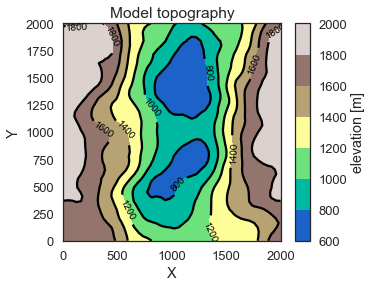

In [4]:
geo_model.set_topography(fd=1.2,d_z=np.array([600,2000]),resolution=np.array([50,50]));

Active grids:

In [5]:
geo_model.grid.grid_types[geo_model.grid.active_grids]

array(['regular', 'topography', 'sections'], dtype='<U10')

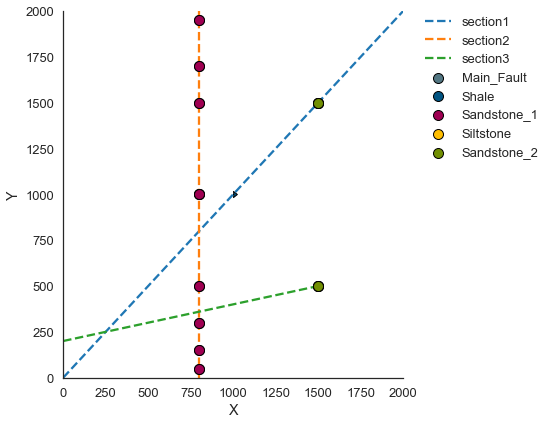

In [6]:
gp.plot.plot_section_traces(geo_model)

In [7]:
gp.set_interpolation_data(geo_model,
                          compile_theano=True,
                          theano_optimizer='fast_compile',
                          verbose=[])

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                  values
range            3464.1
$C_o$            285714
drift equations  [3, 3]


In [8]:
sol = gp.compute_model(geo_model, compute_mesh=False)

80.01828576368348


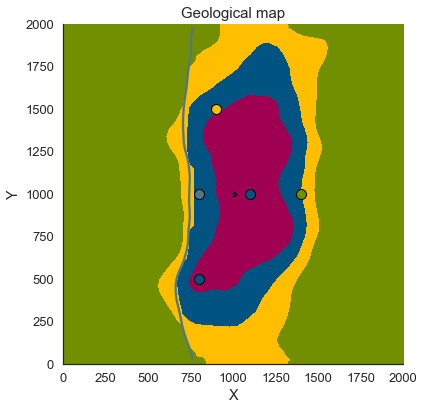

In [9]:
gp.plot.plot_map(geo_model)

../../..\gempy\plot\visualization_2d.py:208: UserWarning: the orientations are not converted to apparent dip.
  warnings.warn('the orientations are not converted to apparent dip.')


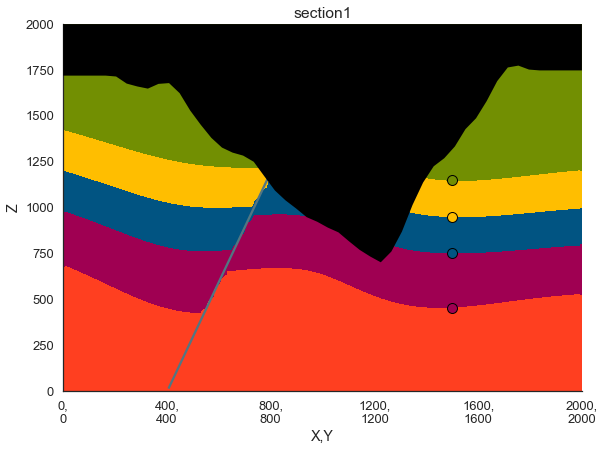

In [10]:
gp.plot.plot_section_by_name(geo_model, 'section1')

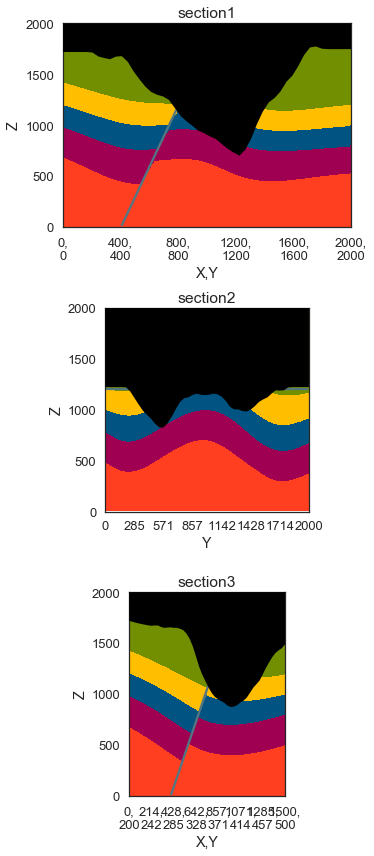

In [11]:
gp.plot.plot_all_sections(geo_model)

### Get polygons of formations in sections

In [12]:
from gempy.utils import section_utils

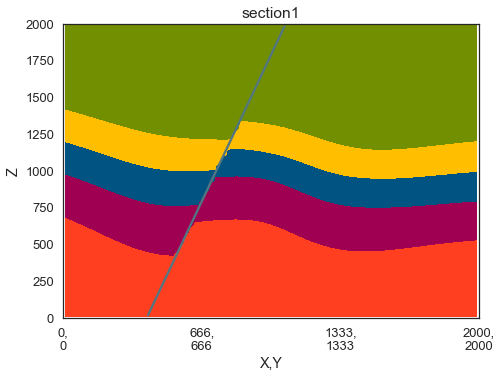

In [13]:
polygondict, cdict, extent = section_utils.get_polygon_dictionary(geo_model, 'section1')

In [14]:
# this stores the xy points in the sections for every surface.
polygondict

{'Main_Fault': [Path(array([[ 574.17067095,   12.5       ],
         [ 579.82756057,   24.46977031],
         [ 585.98562123,   37.5       ],
         [ 597.80057151,   62.5       ],
         [ 608.11183182,   84.31824749],
         [ 609.61552173,   87.5       ],
         [ 621.43047197,  112.5       ],
         [ 633.24542214,  137.5       ],
         [ 636.39610307,  144.16672499],
         [ 645.06037231,  162.5       ],
         [ 656.87532242,  187.5       ],
         [ 664.68037432,  204.01520291],
         [ 668.69027248,  212.5       ],
         [ 680.50522252,  237.5       ],
         [ 692.32017246,  262.5       ],
         [ 692.96464556,  263.86368142],
         [ 704.13512239,  287.5       ],
         [ 715.95007222,  312.5       ],
         [ 721.24891681,  323.71216065],
         [ 727.76502198,  337.5       ],
         [ 739.57997167,  362.5       ],
         [ 749.53318806,  383.56064086],
         [ 751.39492124,  387.5       ],
         [ 763.20987076,  412.5       

##### Look at resulting polygons:

In [15]:
import matplotlib.path
import matplotlib.patches as patches

In [16]:
def plot_pathdict(pathdict, cdict, extent, ax=None, surfaces=list(geo_model.surfaces.df['surface'])[:-1][::-1]):
    if ax == None:
        fig, ax = plt.subplots()
    for formation in surfaces:
        for path in pathdict.get(formation):
            if path !=[]:
                if type(path) == matplotlib.path.Path:
                    patch = patches.PathPatch(path, fill=False, lw=1, edgecolor=cdict.get(formation, 'k'))
                    ax.add_patch(patch)
                elif type(path) == list:
                    for subpath in path:
                        assert type(subpath == matplotlib.path.Path)
                        patch = patches.PathPatch(subpath, fill=False, lw=1, edgecolor=cdict.get(formation, 'k'))
                        ax.add_patch(patch)
    ax.set_ylim(extent[2:4])
    ax.set_xlim(extent[:2])

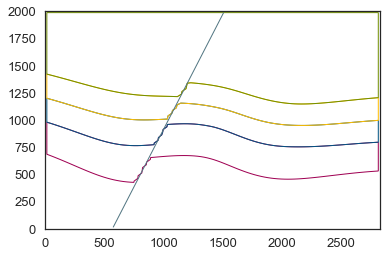

In [17]:
plot_pathdict(polygondict, cdict, extent)

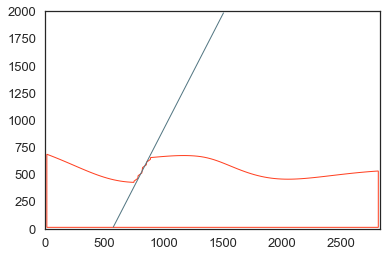

In [18]:
plot_pathdict(polygondict, cdict, extent, surfaces=['basement', 'Main_Fault'])